<a href="https://colab.research.google.com/github/mhieu2001/FIFA-WC-2022-Prediction-by-Python/blob/main/FIFA_WC_2022_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files 
uploaded = files.upload () 
df=pd.read_csv("international_matches.csv")
df.head()

Saving international_matches.csv to international_matches.csv


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape


(23921, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [5]:
df["date"]=pd.to_datetime(df["date"])
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [6]:
fifa_rank=df[["date","home_team","away_team","home_team_fifa_rank","away_team_fifa_rank","away_team_total_fifa_points","home_team_total_fifa_points"]]

home=fifa_rank[["date","home_team","home_team_fifa_rank","home_team_total_fifa_points"]].rename(columns={"home_team":"team","home_team_fifa_rank":"rank","home_team_total_fifa_points":"rank_points"})

away=fifa_rank[["date","away_team","away_team_fifa_rank","away_team_total_fifa_points"]].rename(columns={"away_team":"team","away_team_fifa_rank":"rank","away_team_total_fifa_points":"rank_points"})

fifa_rank=home.append(away)

fifa_rank=fifa_rank.sort_values(["team","date"],ascending=[True,False])
fifa_rank["row_number"]=fifa_rank.groupby("team").cumcount()+1
fifa_rank_top=fifa_rank[fifa_rank["row_number"]==1].drop("row_number",axis=1).nsmallest(10,"rank")

fifa_rank_top

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [7]:
columns_contains_null=[col for col in df.columns if df[col].isnull().any()]
print(f'columns contain \'null\' values: \n\n {columns_contains_null}')

columns contain 'null' values: 

 ['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


In [8]:
wc_2022=['Argentina', 'Poland', 'Portugal', 'Brazil', 'Belgium', 'France',
       'Germany', 'England', 'Korea Republic', 'Netherlands', 'Senegal',
       'Spain', 'Uruguay', 'Costa Rica', 'Croatia', 'Denmark',
       'Switzerland', 'Serbia', 'Morocco', 'Mexico', 'Cameroon', 'Ghana',
       'Wales', 'USA', 'Canada', 'Japan', 'Ecuador', 'IR Iran',
       'Australia', 'Tunisia', 'Saudi Arabia']

In [9]:
for x in wc_2022:
  for y in columns_contains_null:
    df[y].fillna(df[df[y[0:9]]==x][y].mean(),inplace = True)

Is there any home team advantage ?

In [10]:
home_team=df[['country','home_team_score','away_team_score']]
home_team.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
1,Brazil,1,1
2,Ecuador,5,0
3,Guinea,1,0
4,Paraguay,1,3


In [11]:
home_team['home_team_score']>home_team['away_team_score']
home_wins = home_team.loc[home_team['home_team_score']>home_team['away_team_score']]
home_wins

,country,home_team_score,away_team_score
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0
...,...,...,...
23908,Netherlands,3,2
23912,Bosnia and Herzegovina,3,2
23915,Turkey,2,0
23916,Moldova,2,1


In [12]:
home_team['home_team_score']<home_team['away_team_score']
home_loss= home_team.loc[home_team['home_team_score']<home_team['away_team_score']]
home_loss

,country,home_team_score,away_team_score
4,Paraguay,1,3
5,Peru,0,1
8,Faroe Islands,0,7
9,Sweden,1,2
26,Iceland,0,1
...,...,...,...
23909,Poland,0,1
23910,Armenia,1,4
23913,Romania,0,3
23917,Liechtenstein,0,2


In [13]:
home_ad = home_wins[['country','home_team_score','away_team_score']].rename(columns={'home_team_score':'Home_team_win','away_team_score':'Home_team_loss'})
away_ad = home_loss[['country','home_team_score','away_team_score']].rename(columns={'home_team_score':'Home_team_win','away_team_score':'Home_team_loss'})

home_advantage = home_ad.append(away_ad)

home_advantage.head()


,country,Home_team_win,Home_team_loss
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0


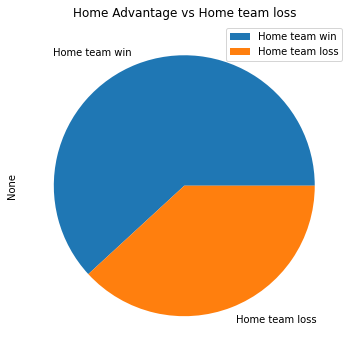

In [14]:
home_advantage.mean().plot(kind='pie', title="Home Advantage vs Home team loss", labels = ['Home team win','Home team loss'],figsize=(6,6))
plt.legend()

## Answer question: Yes,there were advantage 

Which team has the most win ?

In [15]:
home_team=df[['date','home_team','home_team_score','away_team_score']]
home_team.head(15)

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [16]:
home_team['home_team_score']>home_team['away_team_score']
homewins = home_team.loc[home_team['home_team_score']>home_team['away_team_score']]

homewins.head()

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0


In [17]:
home_team['home_team_score']<home_team['away_team_score']
homeloss = home_team.loc[home_team['home_team_score']<home_team['away_team_score']]

homeloss.head()

,date,home_team,home_team_score,away_team_score
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2
26,1993-08-31,Iceland,0,1


In [18]:
hometeams_wins = homewins[['date', 'home_team','home_team_score','away_team_score']].rename(columns={'home_team':'Team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})
awayteams_wins = homeloss[['date', 'home_team','home_team_score','away_team_score']].rename(columns={'home_team':'Team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})

Team_streak=hometeams_wins.append(awayteams_wins)

Team_streak

,date,Team,Home_team_win,away_team_win
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
...,...,...,...,...
23909,2022-06-14,Poland,0,1
23910,2022-06-14,Armenia,1,4
23913,2022-06-14,Romania,0,3
23917,2022-06-14,Liechtenstein,0,2


In [19]:
Team_streak['Team'].value_counts().nlargest(1)

USA    253
Name: Team, dtype: int64

What is the winning percentage comparing when the highest ranked team plays against the lowest ranked team ?

In [20]:
def victory (team1, team2, team1_rank, team2_rank,team1_score,team2_score):
  if team1_score>team2_score:
    winner = team1
  elif team1_score==team2_score:
    winner='Draw'
  else: 
    winner = team2
  return winner

In [21]:
df['winner']=df.apply(lambda x: victory(x['home_team'],x['away_team'],x['home_team_fifa_rank'],x['away_team_fifa_rank'],x['home_team_score'],x['away_team_score']),axis=1)

In [22]:
def rank(home,away,rank_home,rank_away):
  if rank_home<rank_away:
    return home
  else: return away

In [23]:
df['better_rank']= df.apply(lambda x: rank(x['home_team'],x['away_team'],x['home_team_fifa_rank'],x['away_team_fifa_rank']), axis=1)

In [24]:
def result_rank(winner,better_rank):
  if winner=="Draw":
    return winner
  if winner==better_rank:
    return 'Highest'
  else: return 'Smallest'

In [25]:
df['result_rank']= df.apply(lambda x: result_rank(x['winner'],x['better_rank']),axis=1)

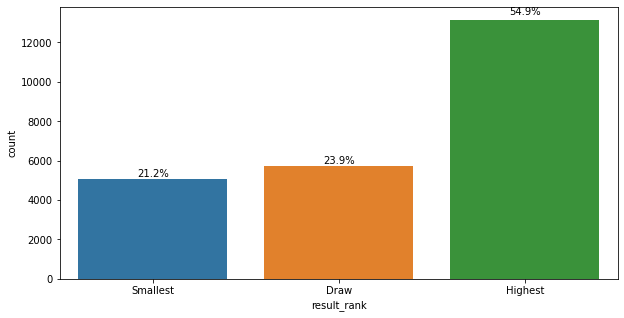

In [26]:
plt.figure(figsize=(10,5))
total= float(len(df))
ax=sns.countplot(x='result_rank',data=df)

for p in ax.patches:
  percentage='{:.1f}%'.format(100*p.get_height()/total)
  
  width=p.get_width()
  height=p.get_height()
  x,y = p.get_xy()
  ax.annotate(percentage,(x+width/2,y+height*1.02),ha='center')

plt.show()

What is the percentage comparing when the highest attack rank plays with the lowest attack rank ?

In [27]:
df_rank_attack=df[df['home_team_mean_offense_score'].notnull()]

In [28]:
df_rank_attack=df[df['away_team_mean_offense_score'].notnull()]

In [29]:
def rank_attack(home,away,rank_home,rank_away):
  if rank_home > rank_away:
    return home 
  else: return away 

In [30]:
df_rank_attack['better_attack']=df.apply(lambda x: rank_attack(x['home_team'],x['away_team'],x['home_team_mean_offense_score'],x['away_team_mean_offense_score']),axis=1)

In [31]:
df_rank_attack['result_attack']=df_rank_attack.apply(lambda x: result_rank(x['winner'],x['better_attack']),axis=1)

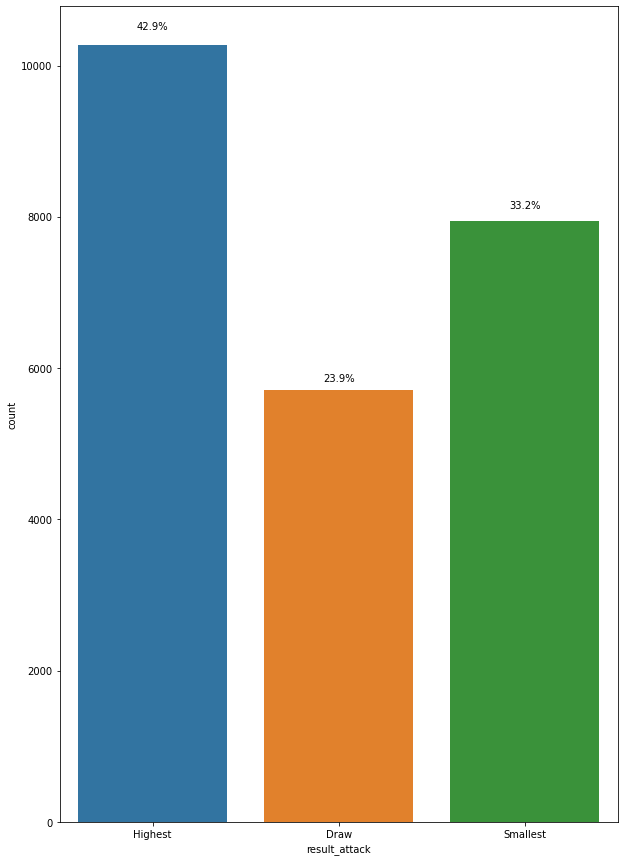

In [32]:
plt.figure(figsize =(10,15))
total =float(len(df_rank_attack))
ax = sns.countplot (x='result_attack',data=df_rank_attack)
for p in ax.patches:
  percentage='{:.1f}%'.format(100*p.get_height()/total)
  
  width=p.get_width()
  height=p.get_height()
  x,y = p.get_xy()
  ax.annotate(percentage,(x+width/2,y+height*1.02),ha='center')

plt.show()

Do teams with stronger offensive player score goal ?

In [33]:
offense_score=[]

for x in wc_2022:
  of_score=np.round((df[df['home_team']==x]['home_team_mean_offense_score'].mean()+df[df['away_team']==x]['away_team_mean_offense_score'].mean())/2,2)
  offense_score.append(of_score)

offense_scores=pd.DataFrame({'Team':wc_2022, 'Of score':offense_score}).sort_values('Of score',ascending=False).reset_index(drop=True)
offense_scores.index +=1
offense_scores

,Team,Of score
1,Argentina,88.25
2,Brazil,87.29
3,Spain,86.65
4,France,86.64
5,Netherlands,86.46
6,England,86.20
7,Portugal,86.02
8,Germany,85.38
9,Uruguay,85.32
10,Belgium,84.01


In [34]:
goals_conceded_home,goals_scored_home,goals_conceded_away,goals_scored_away=[],[],[],[]
total_goals_scored,total_goals_conceded=[],[]
for team in wc_2022:
  gch=df[df['home_team']==team]['away_team_score'].sum()
  gsh=df[df['home_team']==team]['home_team_score'].sum()
  gsa=df[df['away_team']==team]['away_team_score'].sum()
  gca=df[df['away_team']==team]['home_team_score'].sum()

  tgc=np.add(gch,gca)
  tgs=np.add(gsh,gsa)

  goals_conceded_home.append(gch)
  goals_conceded_away.append(gca)
  goals_scored_home.append(gsh)
  goals_scored_away.append(gsa)

  total_goals_conceded.append(tgc)
  total_goals_scored.append(tgs)



In [35]:
  goals = pd.DataFrame({'Team':wc_2022,'Scored goals home':goals_scored_home,'Scored goal away':goals_scored_away,'Conceded goals home':goals_conceded_home,'Concede goals away':goals_conceded_away,'Total scored goals':total_goals_scored,'Total conceded goals':total_goals_conceded})

  goals['Goals_difference']=goals['Total scored goals'] - goals['Total conceded goals']
  goals['Goals ratio ']=goals['Total scored goals']/goals['Total conceded goals']

  goals = goals.sort_values('Goals_difference',ascending=False).reset_index(drop=True)
  goals.index +=1
  goals

,Team,Scored goals home,Scored goal away,Conceded goals home,Concede goals away,Total scored goals,Total conceded goals,Goals_difference,Goals ratio
1,Brazil,558,396,141,159,954,300,654,3.180000
2,Spain,469,312,107,141,781,248,533,3.149194
3,Germany,544,331,220,171,875,391,484,2.237852
4,IR Iran,425,288,115,165,713,280,433,2.546429
5,Netherlands,426,274,145,142,700,287,413,2.439024
6,France,447,223,154,112,670,266,404,2.518797
7,Portugal,424,244,124,144,668,268,400,2.492537
8,England,384,246,132,119,630,251,379,2.509960
9,Japan,533,243,273,153,776,426,350,1.821596
10,Mexico,572,286,272,247,858,519,339,1.653179


In [36]:
offense_players_vs_goals_scored=offense_scores.merge(goals,on='Team')[['Team','Of score','Total scored goals']]
offense_players_vs_goals_scored['Total score goals/Gk score']=offense_players_vs_goals_scored['Total scored goals']/offense_players_vs_goals_scored['Of score']
offense_players_vs_goals_scored=offense_players_vs_goals_scored.sort_values('Total score goals/Gk score',ascending= False).reset_index(drop=True)
offense_players_vs_goals_scored.index+=1
offense_players_vs_goals_scored

,Team,Of score,Total scored goals,Total score goals/Gk score
1,Brazil,87.29,954,10.929087
2,Mexico,82.80,858,10.362319
3,Germany,85.38,875,10.248302
4,Japan,79.23,776,9.794270
5,USA,80.79,761,9.419483
6,Saudi Arabia,83.56,762,9.119196
7,Spain,86.65,781,9.013272
8,IR Iran,82.78,713,8.613192
9,Korea Republic,80.46,685,8.513547
10,Netherlands,86.46,700,8.096229


Text(0.5, 1.0, 'Top 10 WC team ratio goal ')

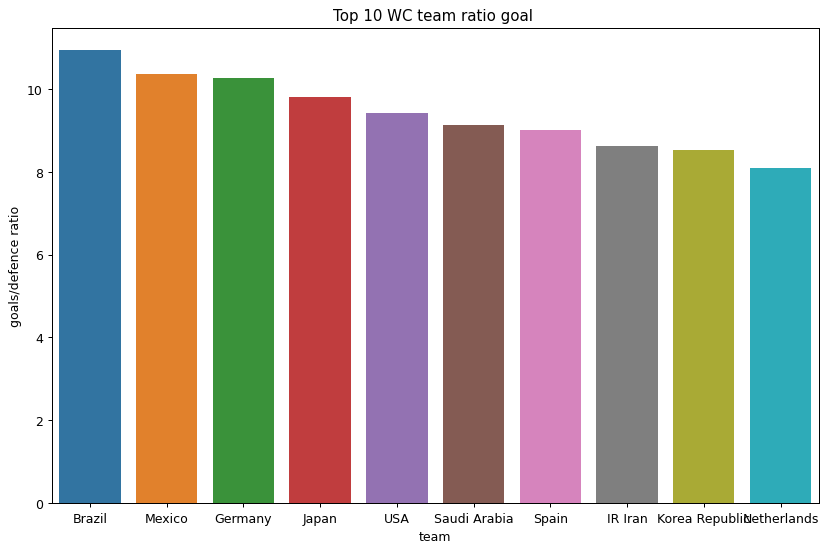

In [37]:
plt.figure(figsize=(11,7), dpi=90)
ax=sns.barplot(data=offense_players_vs_goals_scored[:10],x='Team',y='Total score goals/Gk score')

#ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('goals/defence ratio')

plt.title('Top 10 WC team ratio goal ')

Do teams with stronger goalkeepers receive fewer goals

In [38]:
goalkeeper_score=[]

for x in wc_2022:
  gk_score=np.round((df[df['home_team']==x]['home_team_goalkeeper_score'].mean()+df[df['away_team']==x]['away_team_goalkeeper_score'].mean())/2,2)
  goalkeeper_score.append(gk_score)

goalkeeper_scores=pd.DataFrame({'Team':wc_2022, 'Gk score':goalkeeper_score}).sort_values('Gk score',ascending=False).reset_index(drop=True)
goalkeeper_scores.index +=1
goalkeeper_scores

,Team,Gk score
1,Spain,86.11
2,Germany,85.83
3,France,84.61
4,Brazil,83.85
5,England,82.36
6,Netherlands,82.33
7,Belgium,81.81
8,Poland,81.59
9,Portugal,81.45
10,USA,80.96


In [39]:
goalkeeper_vs_goals_conceded=goalkeeper_scores.merge(goals,on='Team')[['Team','Gk score','Total conceded goals']]
goalkeeper_vs_goals_conceded['Conceded goals/Gk score Ratio']=goalkeeper_vs_goals_conceded['Total conceded goals']/goalkeeper_vs_goals_conceded['Gk score']
goalkeeper_vs_goals_conceded=goalkeeper_vs_goals_conceded.sort_values('Conceded goals/Gk score Ratio',ascending= True).reset_index(drop=True)
goalkeeper_vs_goals_conceded.index+=1
goalkeeper_vs_goals_conceded

,Team,Gk score,Total conceded goals,Conceded goals/Gk score Ratio
1,Serbia,76.48,193,2.523536
2,Spain,86.11,248,2.880037
3,England,82.36,251,3.047596
4,France,84.61,266,3.143836
5,Morocco,75.50,240,3.178808
6,Portugal,81.45,268,3.290362
7,Netherlands,82.33,287,3.485971
8,Brazil,83.85,300,3.577818
9,IR Iran,76.60,280,3.655352
10,Canada,75.34,276,3.663393


Text(0.5, 1.0, 'Top 10 team best in conceded goals/gk score ratio ')

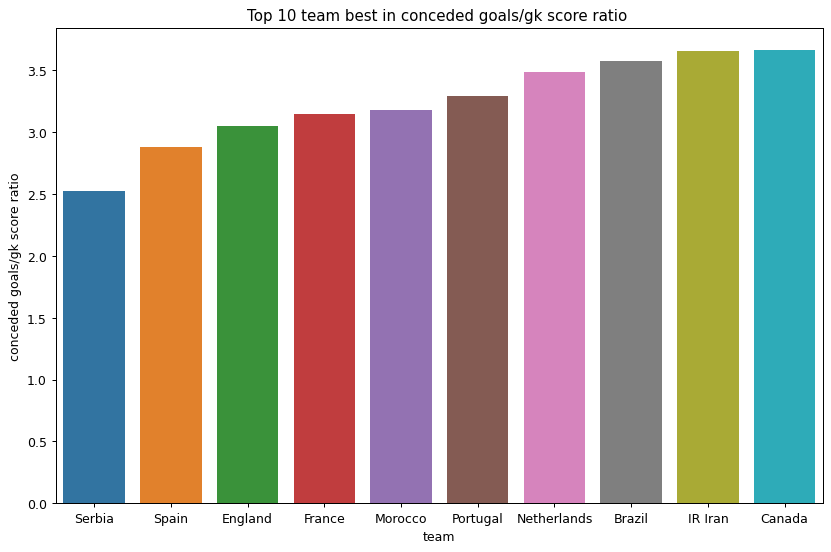

In [40]:
plt.figure(figsize=(11,7), dpi=90)
ax=sns.barplot(data=goalkeeper_vs_goals_conceded[:10],x='Team',y='Conceded goals/Gk score Ratio')

#ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('conceded goals/gk score ratio')

plt.title('Top 10 team best in conceded goals/gk score ratio ')

 !!! Error Top 10 team with longest win streak 

In [ ]:
dframes={}
for team in wc_2022: 
  df1=df[(df['home_team']==team) | (df['away_team'==team])]
  df1['winns']=np.where(((df1['home_team']==team) & (df1['home_team_result']=='Win')) | ((df1['away_team']==team) & (df1['home_team_result']=='Lose')),1,0)

  name =team+ '_streak'
  dframes[name]=df1 

streaks=[]
for frame in dframes.keys():
  dframes[frame]['start_of_streak']= dframes[frame]['winns'].ne(dframes[frame]['winns'].shift())
  dframes[frame]['streak_id']= dframes[frame]['start_of_streak'].cumsum()
  dframes[frame]['streak_counter']= dframes[frame].groupby('streak_id').cumcount()+1

  streak =dframes[frame][dframes[frame]['winns']==1]['streak_counter'].max()
  streaks.append(streak)

Streaks = pd.DataFrame({'Team':wc_2022,'Streak':streaks}).sort_value('Streak',ascending=False).reset_index(drop=True)
Streaks.index +=1
Streaks

Error !! Compare win rate between home team and away team 

In [42]:
away_team_better_rank=df[(df['home_team_fifa_rank']>df['away_team_fifa_rank'])]['home_team_result'].value_counts()
away_team_better_rank

Lose    4984
Win     3429
Draw    2840
Name: home_team_result, dtype: int64

Best defence,mid,offense and Gk 

In [ ]:
## Error 
ranks=[]
for x in wc_2022:
  rank_df=df[(df['home_team']== x) | (df['away_team']== x)].sort_values('date','home_team_fifa_rank','away_team_fifa_rank')
  if rank_df['home_team']==x:
    rank=rank_df['home_team_fifa_rank']
  else:
    rank=rank_df['away_team_fifa_rank']
  ranks.append(rank)

team_ranks=pd.DataFrame({'Team':wc_2022,'Rank':ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks+=1
team_ranks

In [44]:
#GK
goalkeeper_score=[]

for x in wc_2022:
  gk_score=np.round((df[df['home_team']==x]['home_team_goalkeeper_score'].mean()+df[df['away_team']==x]['away_team_goalkeeper_score'].mean())/2,2)
  goalkeeper_score.append(gk_score)

goalkeeper_scores=pd.DataFrame({'Team':wc_2022,'Gk score':goalkeeper_score}).sort_values('Gk score',ascending=False).reset_index(drop=True)
goalkeeper_scores.index +=1
goalkeeper_scores

,Team,Gk score
1,Spain,86.11
2,Germany,85.83
3,France,84.61
4,Brazil,83.85
5,England,82.36
6,Netherlands,82.33
7,Belgium,81.81
8,Poland,81.59
9,Portugal,81.45
10,USA,80.96


Text(0.5, 1.0, 'Top 10 team best in gk score')

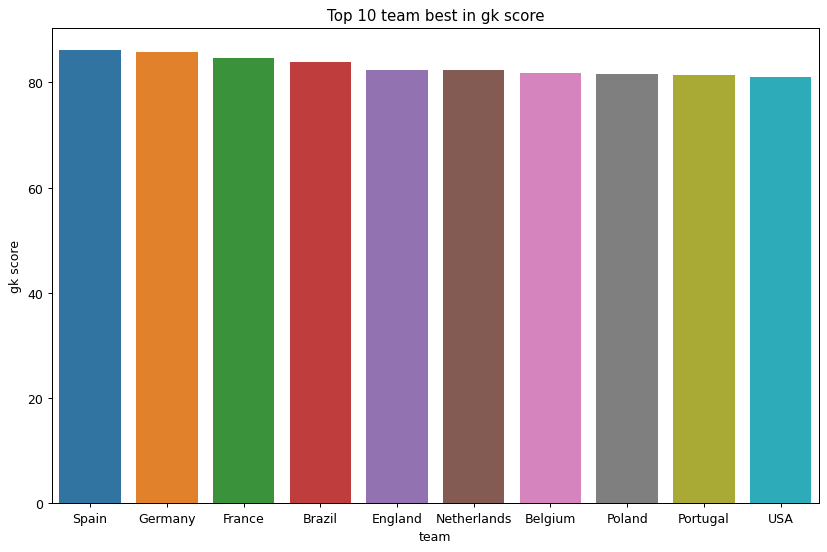

In [45]:
# GK
plt.figure(figsize=(11,7), dpi=90)
ax=sns.barplot(data=goalkeeper_scores[:10],x='Team',y='Gk score')

#ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('gk score')

plt.title('Top 10 team best in gk score')

In [46]:
## Defense
defence_score=[]

for x in wc_2022:
  df_score=np.round((df[df['home_team']==x]['home_team_mean_defense_score'].mean()+df[df['away_team']==x]['away_team_mean_defense_score'].mean())/2,2)
  defence_score.append(df_score)

defence_scores=pd.DataFrame({'Team':wc_2022,'df score':defence_score}).sort_values('df score',ascending=False).reset_index(drop=True)
defence_scores.index +=1
defence_scores

,Team,df score
1,Spain,84.67
2,Brazil,84.66
3,England,84.09
4,Germany,84.05
5,France,83.69
6,Argentina,83.00
7,Portugal,82.92
8,IR Iran,81.89
9,Belgium,81.85
10,Netherlands,81.53


Text(0.5, 1.0, 'Top 10 team best in defense')

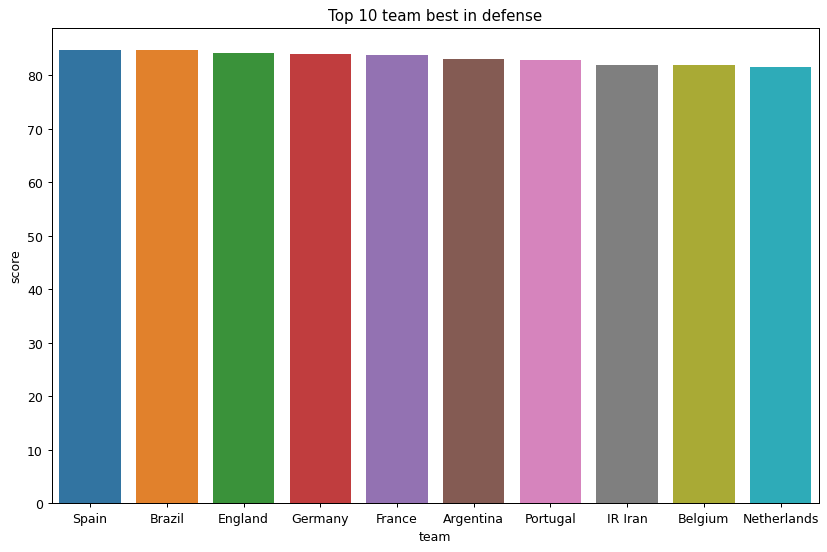

In [47]:
### Defense
plt.figure(figsize=(11,7), dpi=90)
ax=sns.barplot(data=defence_scores[:10],x='Team',y='df score')

#ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')

plt.title('Top 10 team best in defense')

In [48]:
#Offense
attack_score=[]

for x in wc_2022:
  atk_score=np.round((df[df['home_team']==x]['home_team_mean_offense_score'].mean()+df[df['away_team']==x]['away_team_mean_offense_score'].mean())/2,2)
  attack_score.append(atk_score)

attack_scores=pd.DataFrame({'Team':wc_2022,'atk score':attack_score}).sort_values('atk score',ascending=False).reset_index(drop=True)
attack_scores.index +=1
attack_scores

,Team,atk score
1,Argentina,88.25
2,Brazil,87.29
3,Spain,86.65
4,France,86.64
5,Netherlands,86.46
6,England,86.20
7,Portugal,86.02
8,Germany,85.38
9,Uruguay,85.32
10,Belgium,84.01


Text(0.5, 1.0, 'Top 10 team best in offense')

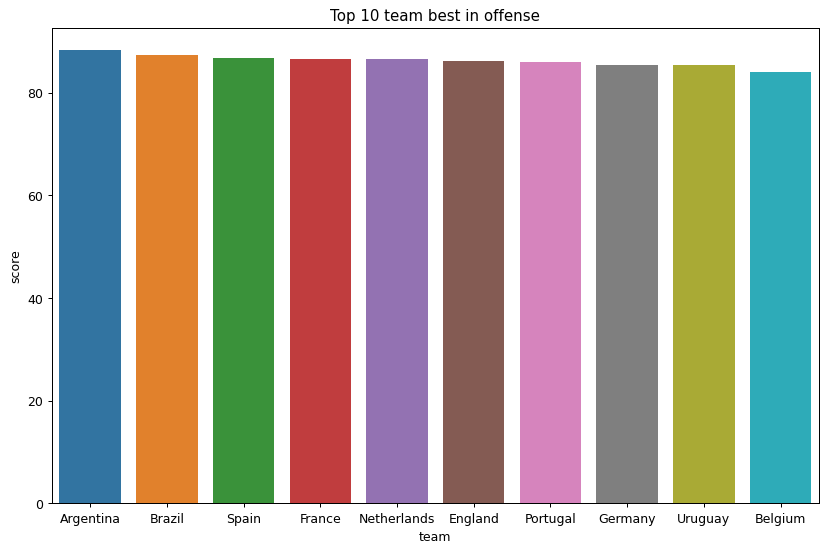

In [49]:
#Offense 
plt.figure(figsize=(11,7), dpi=90)
ax=sns.barplot(data=attack_scores[:10],x='Team',y='atk score')

#ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')

plt.title('Top 10 team best in offense')

In [50]:
#Midfield
midfield_score=[]

for x in wc_2022:
  mid_score=np.round((df[df['home_team']==x]['home_team_mean_midfield_score'].mean()+df[df['away_team']==x]['away_team_mean_midfield_score'].mean())/2,2)
  midfield_score.append(mid_score)

midfield_scores=pd.DataFrame({'Team':wc_2022,'mid score':midfield_score}).sort_values('mid score',ascending=False).reset_index(drop=True)
midfield_scores.index +=1
midfield_scores

,Team,mid score
1,Spain,86.23
2,France,85.53
3,Germany,85.29
4,Brazil,84.96
5,England,84.49
6,Argentina,84.44
7,Netherlands,83.96
8,Portugal,83.87
9,Belgium,82.54
10,Croatia,82.35


Text(0.5, 1.0, 'Top 5 team best in midfield')

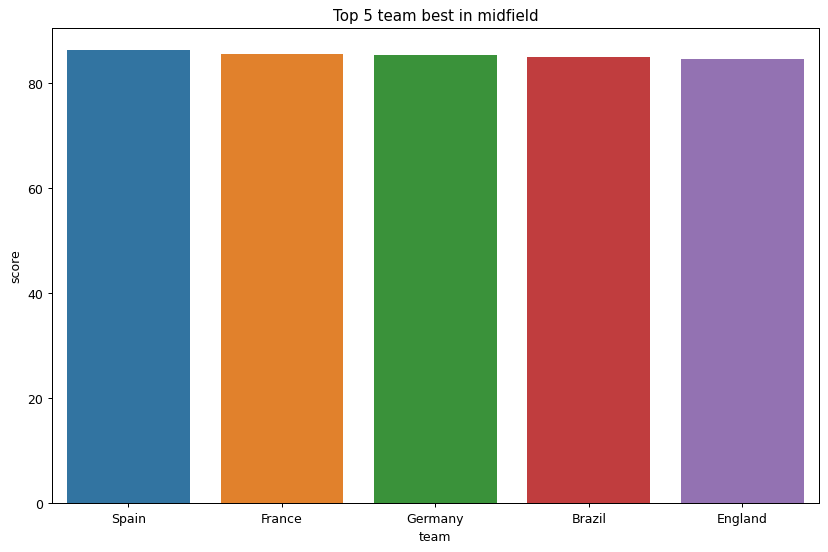

In [51]:
#Midfield
plt.figure(figsize=(11,7), dpi=90)
ax=sns.barplot(data=midfield_scores[:5],x='Team',y='mid score')

#ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')

plt.title('Top 5 team best in midfield')

In [78]:
#win percentage

hwins,hdraws,hloses=[],[],[]
awins,adraws,aloses=[],[],[]
for team in wc_2022:
  home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
  home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
  home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]

  away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
  away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
  away_lose = df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]

  hwins.append(home_win)
  hdraws.append(home_draw)
  hloses.append(home_lose)

  awins.append(away_win)
  adraws.append(away_draw)
  aloses.append(away_lose)

  wins = np.add(hwins, awins)
  draws = np.add(hdraws, adraws)
  loses = np.add(hloses, aloses)

In [84]:
win_draw_lose=pd.DataFrame({'Team':wc_2022,'Win':wins,'Draw':draws,'Lose':loses,'Home win':hwins,'Home draw':hdraws,'Home lose':hloses,'Away win':awins,'Away lose':aloses,'Away draw':adraws})

win_draw_lose.insert(1,'Total',win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8,'Total Home',win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
win_draw_lose.insert(12,'Total Away',win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %']=np.round(100*win_draw_lose['Win']/win_draw_lose['Total'],2)
win_draw_lose['Draw %']=np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'],2)
win_draw_lose['Lose %']=np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'],2)

win_draw_lose['Home Win %']=np.round(100*win_draw_lose['Home win']/win_draw_lose['Total Home'],2)
win_draw_lose['Home Draw %']=np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'],2)
win_draw_lose['Home Lose %']=np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'],2)

win_draw_lose['Away Win %']=np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'],2)
win_draw_lose['Away Draw %']=np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'],2)
win_draw_lose['Away Lose %']=np.round(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'],2)

win_draw_lose=win_draw_lose.sort_values('Win %',ascending=False).reset_index(drop=True)
win_draw_lose.index+=1
win_draw_lose.style.set_properties(**{'background-color':'green','color':'white'},subset=['Home win','Home Win %','Win %'])

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away lose,Away draw,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,35,45,200,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
2,Spain,354,246,64,44,145,27,17,189,101,27,37,165,69.490000,18.080000,12.430000,76.720000,14.290000,8.990000,61.210000,22.420000,16.360000
3,France,370,230,83,57,145,44,32,221,85,25,39,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
4,Germany,390,240,82,68,139,44,36,219,101,32,38,171,61.540000,21.030000,17.440000,63.470000,20.090000,16.440000,59.060000,22.220000,18.710000
5,IR Iran,366,217,79,70,133,31,27,191,84,43,48,175,59.290000,21.580000,19.130000,69.630000,16.230000,14.140000,48.000000,27.430000,24.570000
6,Netherlands,340,201,74,65,119,40,33,192,82,32,34,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,336,198,79,59,123,37,24,184,75,35,42,152,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Argentina,367,216,79,72,130,36,24,190,86,48,43,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
9,England,334,196,75,63,124,38,32,194,72,31,37,140,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
10,Croatia,320,172,79,69,92,38,24,154,80,45,41,166,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000


Text(0.5, 1.0, 'Top 15 team with highest win percentage')

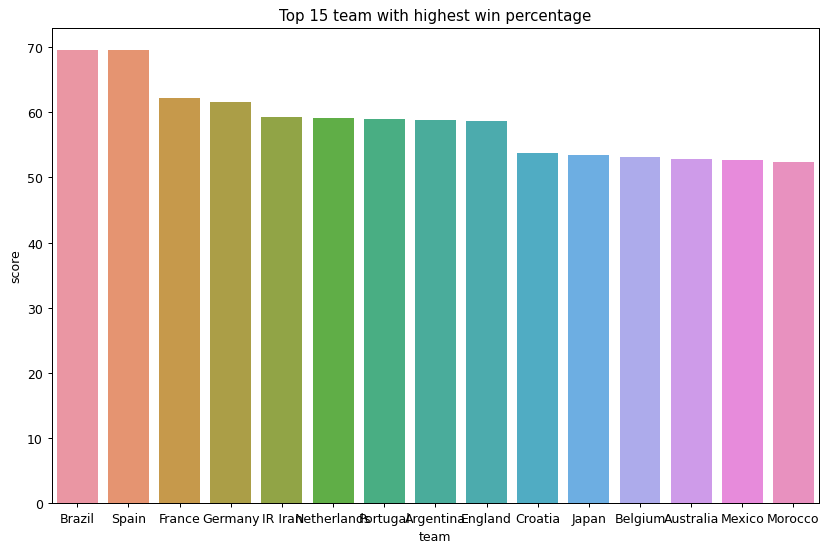

In [92]:
plt.figure(figsize=(11,7), dpi=90)
ax=sns.barplot(data=win_draw_lose[:15],x='Team',y='Win %')

#ax.bar_label(ax.containers[0])
plt.xlabel("team")
plt.ylabel('score')

plt.title('Top 15 team with highest win percentage')

In [93]:
df['rank_difference']=df['home_team_fifa_rank']-df['away_team_fifa_rank']
df['average_rank']=(df['home_team_fifa_rank']+df['away_team_fifa_rank'])/2
df['point_difference']=df['home_team_total_fifa_points']-df['away_team_total_fifa_points']
df['score_difference']=df['home_team_score']-df['away_team_score']

In [94]:
df['is_won']=df['score_difference']>0
df['is_stake']=df['tournament']!='Friendly'

# Not finish yet !! The main question, fundamental prediction WC 2022 by Python 

In [95]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


Text(0.5, 1.0, 'AUC score is 0.74')

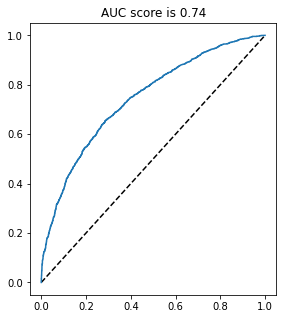

In [100]:
X, y = df.loc[:,['average_rank','rank_difference','point_difference']],df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

logreg=linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)

model=Pipeline([
    ('polynomial_features',features),
    ('logistic_regression',logreg)
])

model=model.fit(X_train,y_train)

fpr,tpr, _ = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0,1],[0,1],'k--')
ax.plot(fpr,tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test,model.predict_proba(X_test)[:,1])))

In [ ]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team']]
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team']]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])